<a href="https://colab.research.google.com/github/omniaghazy/mnist_/blob/main/mnist((slide_2)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# تجهيز البيانات

IMPORT LIBRARIES


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

load dataset mnist from dataets in keras


train , test = load_data()


In [2]:
(x_train , y_train),(x_test , y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Normalization on data(input to model )

In [3]:
x_train = x_train / 255.0
x_test =  x_test/ 255.0

Reshaping :(-1 , width * height) on data(input)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1 , 28*28)

on label : we have categorical (labeled data) sooooo

Categorial Encoding


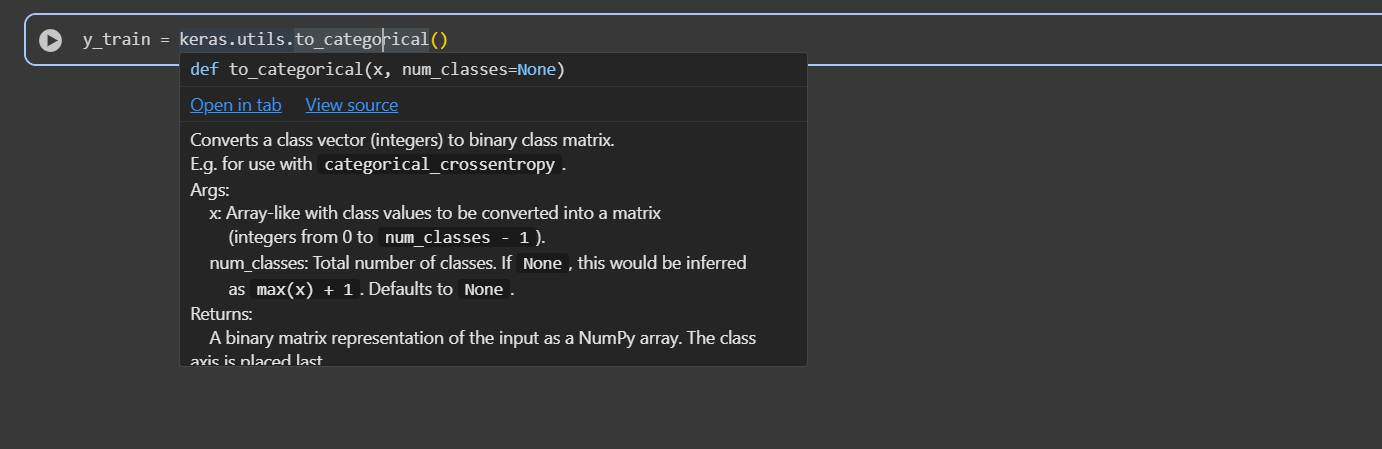

In [6]:
y_train = keras.utils.to_categorical(y_train , num_classes= 10)
y_test = keras.utils.to_categorical(y_test ,num_classes = 10)

# تجهيز الموديل وتجميعه

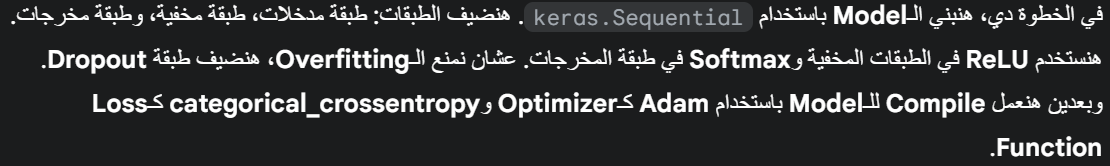

هنبني ال موديل

In [7]:
model = keras.Sequential([
    keras.layers.Dense(512 ,input_shape =(784,),activation="relu"),
    keras.layers.Dropout(.2),
    keras.layers.Dense(512 , activation ="relu"),
    keras.layers.Dropout(.2),
    keras.layers.Dense(10 , activation = "softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


هنجمع الموديل

In [8]:
model.compile(
    optimizer = "adam",
    loss ="categorical_crossentropy",
    metrics = ["accuracy"]
)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

# Training


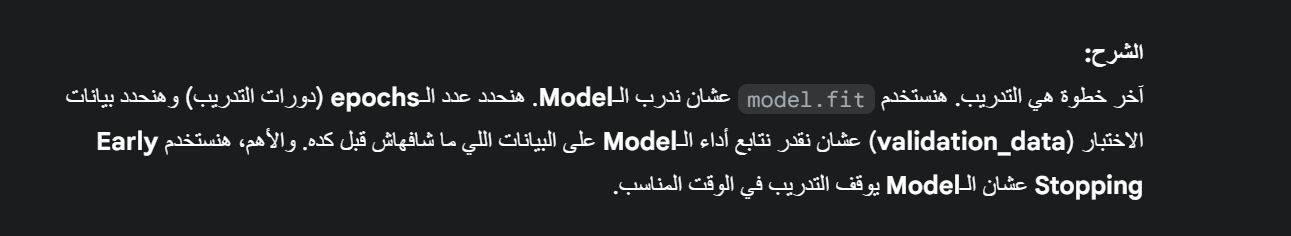

In [10]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [11]:
history = model.fit(
    x_train,y_train,
    epochs = 20 ,
    batch_size = 128 ,
    validation_data = (x_test,y_test),
    callbacks = [early_stopping]
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.8607 - loss: 0.4564 - val_accuracy: 0.9681 - val_loss: 0.1004
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9662 - loss: 0.1125 - val_accuracy: 0.9733 - val_loss: 0.0841
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9772 - loss: 0.0729 - val_accuracy: 0.9753 - val_loss: 0.0756
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9822 - loss: 0.0548 - val_accuracy: 0.9797 - val_loss: 0.0696
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9852 - loss: 0.0457 - val_accuracy: 0.9805 - val_loss: 0.0705
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9872 - loss: 0.0370 - val_accuracy: 0.9829 - val_loss: 0.0570
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9890 - loss: 0.0321 - val_accuracy: 0.9801 - val_loss: 0.0721
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9903 - loss: 0.0289 - 

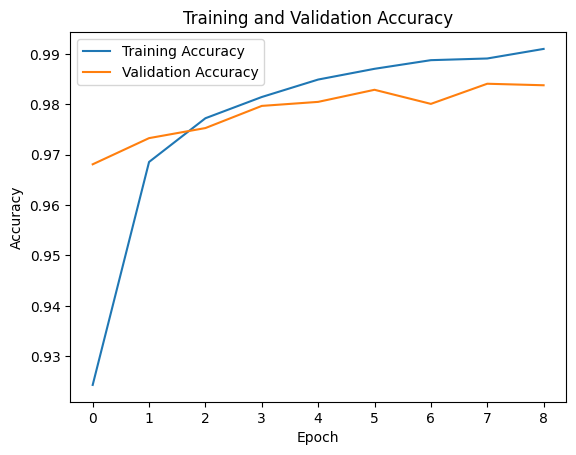

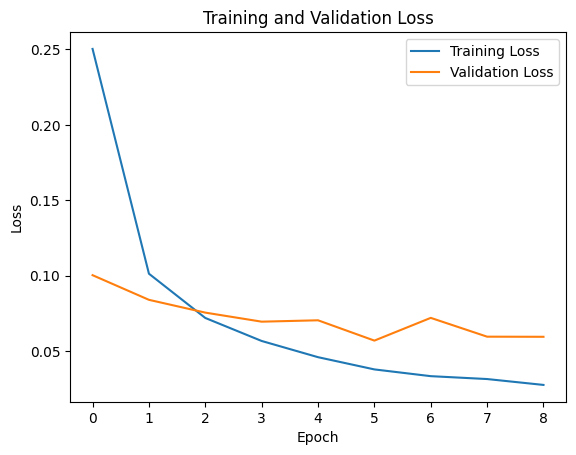

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Evaluation

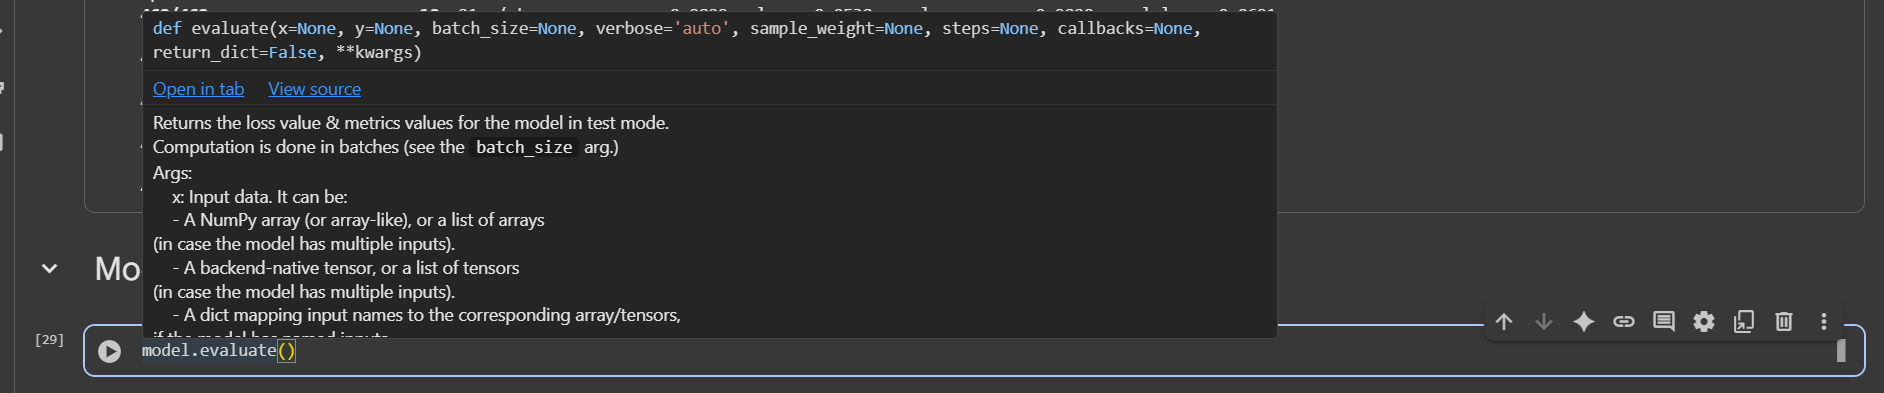

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"loss: {loss:.4f}")
print(f"accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9810 - loss: 0.0778
loss: 0.0596
accuracy: 0.9838


# Making Predictions

In [14]:
single_image = x_test[0:1]
true_label = np.argmax(y_test[0])


predictions = model.predict(single_image)
predicted_label = np.argmax(predictions)

print(f"predicted_label = {predicted_label}")
print(f"true_label = {true_label}")
print(f"predictions= {predictions}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
predicted_label = 7
true_label = 7
predictions= [[3.6470575e-09 3.6351285e-08 2.3611645e-07 1.3519479e-05 2.3757388e-10
  5.6372802e-11 2.9442880e-12 9.9996853e-01 7.1593846e-09 1.7755045e-05]]


# Save model

In [15]:
model.save('mnist_model.h5')



# load model

In [16]:
# استيراد الدالة من Keras لتحميل الـModel
from tensorflow.keras.models import load_model

# تحميل الـModel من الملف
loaded_model = load_model('mnist_model.h5')

# عرض ملخص للـModel عشان تتأكد إنه اتحمل صح
loaded_model.summary()

# استخدام الـModel اللي تم تحميله للتخمين
predictions_loaded = loaded_model.predict(x_test[1:2])
predicted_label_loaded = np.argmax(predictions_loaded)
true_label = np.argmax(y_test[1:2])

print(f"predicted_label_loaded : {predicted_label_loaded}")
print(f"true_label : {true_label}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,708 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
predicted_label_loaded : 2
true_label : 2
